### Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# stop warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('measurements.csv', decimal=',')

In [3]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [4]:
#lower case the column, and put _ between words
data.columns = [e.lower().replace(' ', '_') for e in data.columns] 

In [5]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters    float64
refill_gas        object
dtype: object

In [6]:
print(sum(data.duplicated()))
print(data.shape)
print(data.isna().sum())

0
(388, 12)
distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64


In [7]:
# I will take a look at the value counts at each column and clean them
for item in data.columns:
    print(data[item].value_counts(dropna=False))

11.8    37
16.0    24
12.3    23
12.4    18
15.4    14
        ..
44.9     1
36.6     1
9.9      1
16.8     1
14.7     1
Name: distance, Length: 174, dtype: int64
5.0     27
4.5     27
4.6     22
4.7     21
4.3     20
4.1     20
5.1     19
4.8     19
4.4     17
4.0     17
4.9     16
4.2     15
5.3     14
3.9     14
5.2     12
3.8     11
5.7     11
5.6     10
5.4      9
3.7      8
5.8      7
5.5      6
5.9      5
3.6      4
6.4      4
6.1      4
6.2      4
6.0      4
6.3      4
8.1      2
6.5      2
7.4      2
6.9      1
8.7      1
12.2     1
7.9      1
10.8     1
9.9      1
7.1      1
3.3      1
9.0      1
11.5     1
6.6      1
Name: consume, dtype: int64
42    18
43    17
38    16
26    15
36    15
33    15
40    15
32    12
44    12
37    12
29    11
39    11
55    11
46    11
45    10
58    10
25    10
24     9
50     9
35     9
57     8
41     8
52     7
53     6
48     6
28     6
30     6
21     6
61     6
51     6
47     5
56     5
22     5
34     4
49     4
27     4
62     4
59 

### Data Cleaning

- I have NaN values at 'temp_inside' column, I decided to fill them with the most frequent element. Already 3 most freq temperatures are between 21.5 and 22.5

In [8]:
# most frequent element
data['temp_inside'].value_counts(dropna=True).index[0]

21.5

In [9]:
data['temp_inside'] = data['temp_inside'].fillna(21.5)

- When I looked at the 'specials' column, a lot of NaN values and there are same elements with lower-uppercase letters
- I also further checked, there are 3 columns related to that 'AC', 'rain' and 'sun'. For ex: if there is -AC sun- in 'specials columns, same row encoded 1 at 'AC' and 'sun' columns.
- So I decided to drop 'specials' column

In [10]:
data['specials'].value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [11]:
# data[data['specials'] == 'AC']
# data[data['specials'] == 'AC rain']
data[data['specials'] == 'sun']

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
219,19.0,4.4,58,22.5,17,sun,SP98,0,0,1,NaN,NaN
239,16.9,4.5,48,22.5,9,sun,E10,0,0,1,NaN,NaN
240,12.4,4.6,55,22.5,11,sun,E10,0,0,1,NaN,NaN
241,17.4,4.4,36,22.5,12,sun,E10,0,0,1,NaN,NaN
248,12.3,5.2,57,22.5,15,sun,E10,0,0,1,NaN,NaN
249,12.5,4.3,57,22.5,16,sun,E10,0,0,1,NaN,NaN
250,31.5,4.1,30,22.5,16,sun,E10,0,0,1,NaN,NaN
253,17.0,3.9,46,22.5,14,sun,E10,0,0,1,NaN,NaN
257,12.4,4.7,55,22.5,14,sun,E10,0,0,1,NaN,NaN
261,24.5,3.9,50,21.5,15,sun,E10,0,0,1,NaN,NaN


In [12]:
data = data.drop(['specials'],axis=1)

- For 'refill_gas' column, there are a lot of NaN values and I also checked similarity with 'gas_type' column
- Apperantly 'gas_type' columns contains same info so I will drop 'refill_gas' column

In [13]:
data[data['refill_gas'] == 'E10']

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10
139,16.1,5.4,24,21.5,7,E10,0,1,0,38.0,E10
171,44.4,4.8,38,21.5,8,E10,0,0,0,38.3,E10
234,19.0,4.5,29,22.5,10,E10,0,0,0,39.0,E10
325,16.6,3.7,49,22.0,17,E10,0,0,0,37.7,E10


In [14]:
data[data['refill_gas'] == 'SP98']

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,refill_liters,refill_gas
44,5.4,3.3,32,21.5,7,SP98,0,0,0,37.6,SP98
82,10.5,3.6,42,20.0,10,SP98,0,0,0,37.7,SP98
106,162.7,5.5,75,23.0,1,SP98,0,0,0,45.0,SP98
191,43.7,4.7,44,22.0,9,SP98,0,1,0,10.0,SP98
192,12.1,4.2,43,22.0,4,SP98,0,0,0,39.0,SP98
274,25.7,4.9,50,22.0,10,SP98,0,1,0,41.0,SP98
313,11.3,4.3,38,22.0,17,SP98,0,0,0,37.0,SP98
349,18.3,4.3,46,22.0,16,SP98,0,0,0,37.2,SP98


In [15]:
data = data.drop(['refill_gas'],axis=1)

- There were same amount of NaN values at the same rows with 'refill_liters' and 'refill_gas' columns
- I decided to drop 'refill_liters' column too

In [16]:
data = data.drop(['refill_liters'],axis=1)

### Analyzing data

- I decided to add a column 'liter_per_km' and 'liter_per_trip' to see fuel consumption better
- It looked at the outliers at 'liter_per_km' column
- When speed is very low, fuel consumption is higher 
- For now I will keep the values liter_per_km below 0.07
- If I have time left, I can analyze outliers seperately later

In [17]:
data['liter_per_trip'] = (data['consume'] * data['distance'])/100

In [18]:
data['liter_per_km'] = data['consume']/100

In [19]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,liter_per_trip,liter_per_km
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.4000,0.050
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.5040,0.042
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.6160,0.055
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.5031,0.039
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.8325,0.045
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.5920,0.037
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.6923,0.043
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.6080,0.038
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.7084,0.046


In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.300,11.80000,14.6000,19.0000,216.1000
consume,388.0,4.912371,1.033172,3.300,4.30000,4.7000,5.3000,12.2000
speed,388.0,41.927835,13.598524,14.000,32.75000,40.5000,50.0000,90.0000
temp_inside,388.0,21.916237,0.997449,19.000,21.50000,22.0000,22.5000,25.5000
temp_outside,388.0,11.358247,6.991542,-5.000,7.00000,10.0000,16.0000,31.0000
ac,388.0,0.077320,0.267443,0.000,0.00000,0.0000,0.0000,1.0000
rain,388.0,0.123711,0.329677,0.000,0.00000,0.0000,0.0000,1.0000
sun,388.0,0.082474,0.275441,0.000,0.00000,0.0000,0.0000,1.0000
liter_per_trip,388.0,0.935294,1.115967,0.120,0.55165,0.6806,0.9165,11.4533
liter_per_km,388.0,0.049124,0.010332,0.033,0.04300,0.0470,0.0530,0.1220


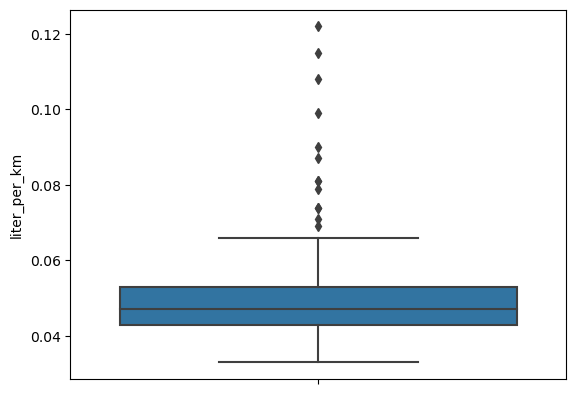

In [21]:
sns.boxplot(y=data['liter_per_km'])
plt.show()

In [22]:
data[data['liter_per_km'] > 0.07]

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,liter_per_trip,liter_per_km
37,4.9,7.4,26,21.5,6,E10,0,0,0,0.3626,0.074
45,2.0,9.9,21,21.5,4,SP98,0,0,0,0.1980,0.099
60,2.9,7.9,18,21.5,9,SP98,1,1,0,0.2291,0.079
61,2.1,12.2,23,21.5,9,SP98,1,1,0,0.2562,0.122
112,5.1,8.7,21,23.5,5,SP98,0,0,0,0.4437,0.087
147,1.7,10.8,14,21.5,10,E10,0,1,0,0.1836,0.108
160,5.1,8.1,39,21.5,4,E10,0,0,0,0.4131,0.081
181,12.3,7.1,52,22.5,0,E10,1,1,0,0.8733,0.071
198,2.9,7.4,24,21.5,14,SP98,0,0,0,0.2146,0.074
206,2.4,9.0,26,20.0,10,SP98,0,0,0,0.2160,0.090


In [23]:
data = data[data['liter_per_km'] < 0.07]

#### Fuel cost

- I would like to add the price too, from the kaggle document
- E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter

In [24]:
def cost_per_km(df_row):
    if df_row['gas_type'] == 'E10':
        cost_per_km = df_row['liter_per_km'] * 1.38
    else:
        cost_per_km = df_row['liter_per_km'] * 1.46
    return cost_per_km

In [25]:
data['cost_per_km'] = data.apply(cost_per_km, axis=1)

I would like to add temperature difference between outside-inside 

- I also wanted to add temperature difference, 
- Because temperature is mostly lower on the outside, I am not going to split them into cooling-heating (I don't have too much time left too)

In [26]:
data['temp_difference'] = data['temp_inside'] - data['temp_outside']

#### Lets look at the graphs

Now I have cleaned my data and added columns that I thought relevant with my analysis

- According to the graphs below; 
- Mostly travelled distances are between 10 to 20 km
- Outside temperature between 7 and 10
- Mostly AC was not used, it was not rainy, and it was not sunny
- When I looked at speed and the cost_per_km, it doesn't tell me a lot

In [27]:
def plot_cont(df):
    for col in df.columns:
        sns.displot(x=df[col])
        plt.show()
    return None

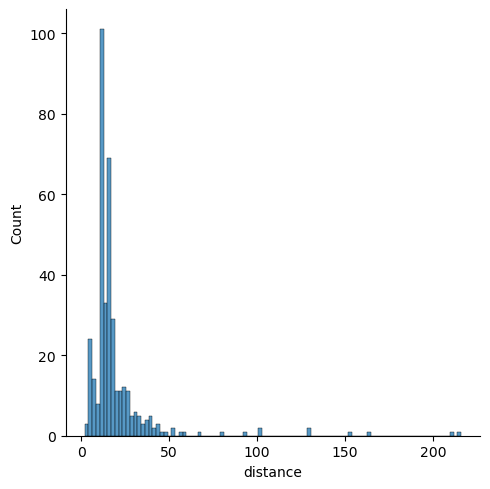

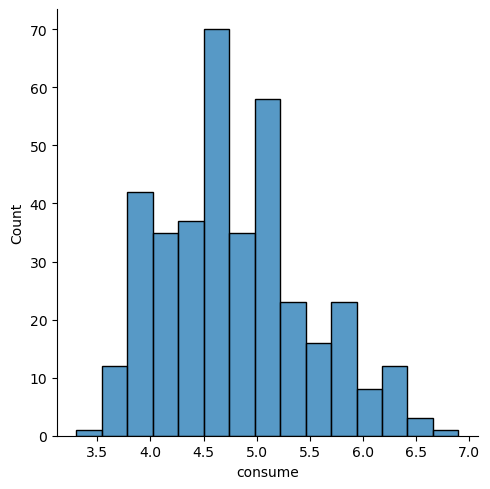

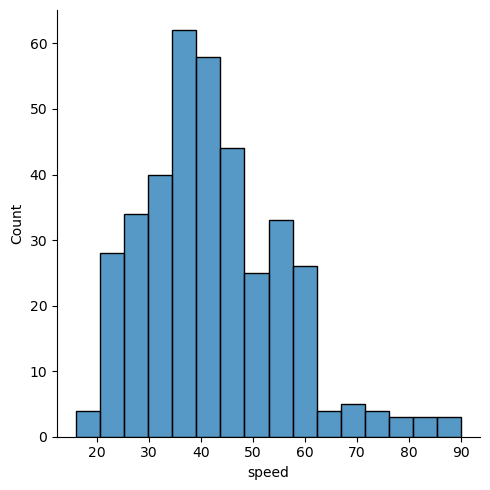

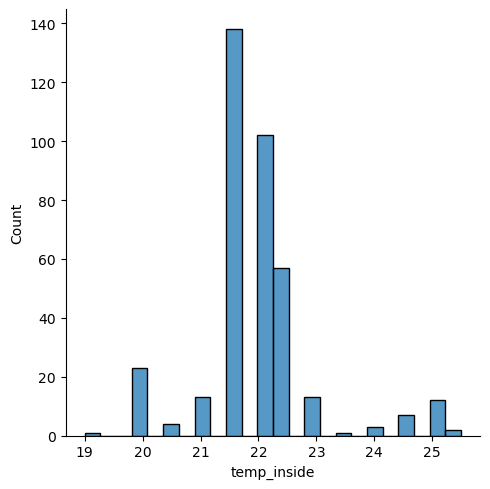

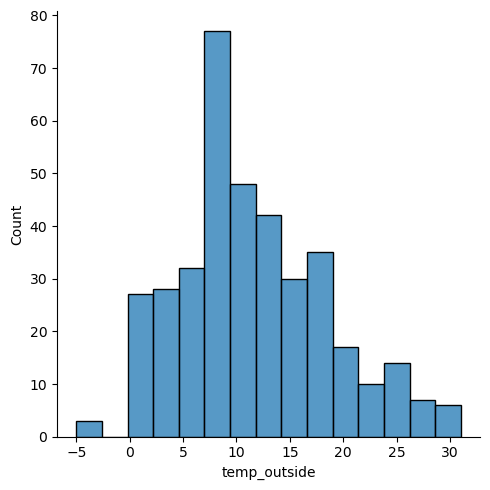

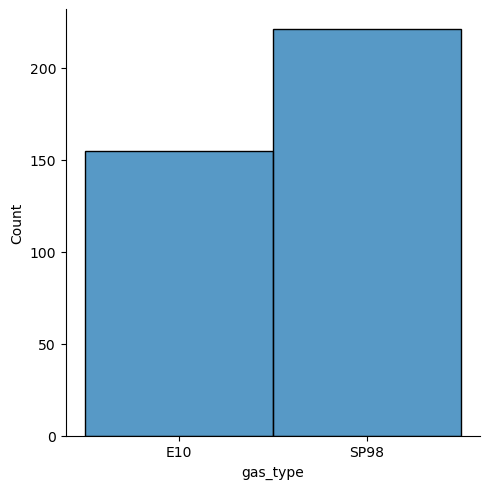

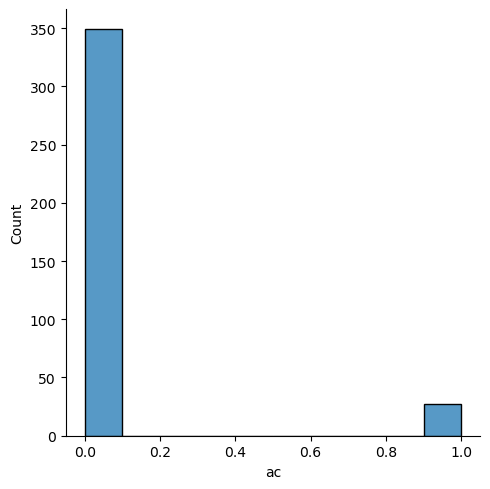

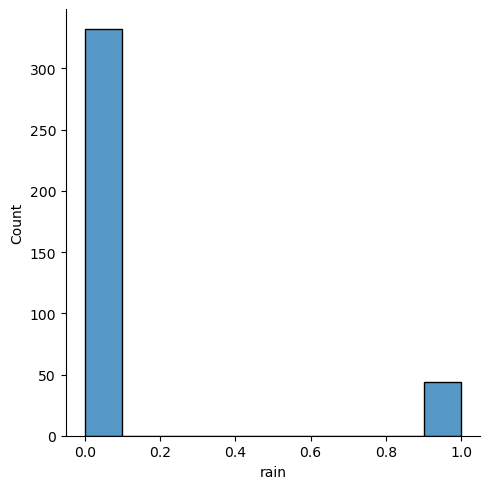

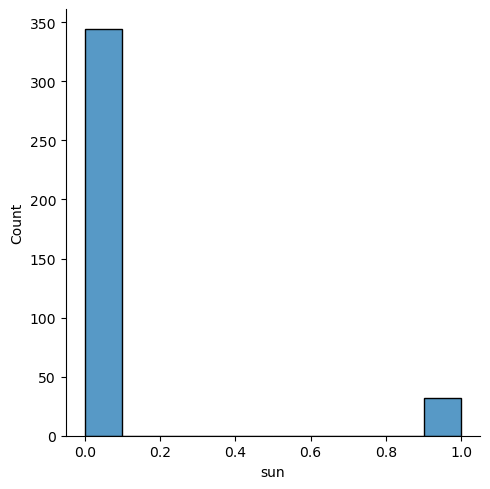

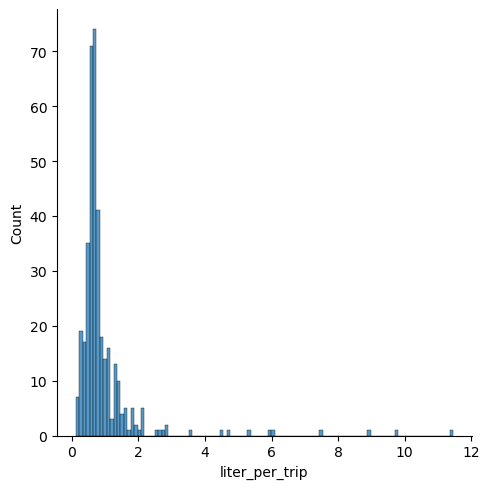

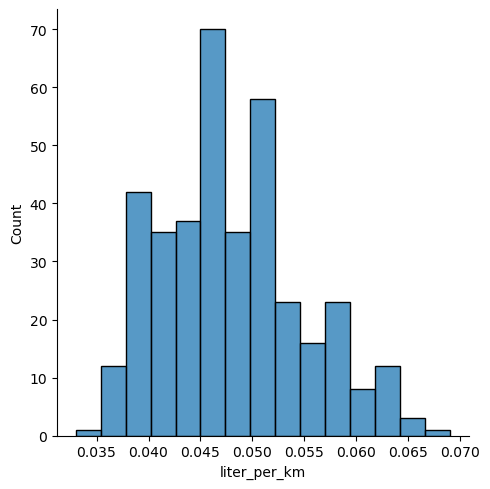

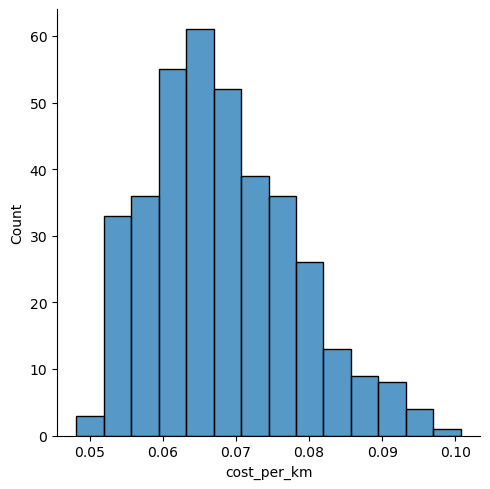

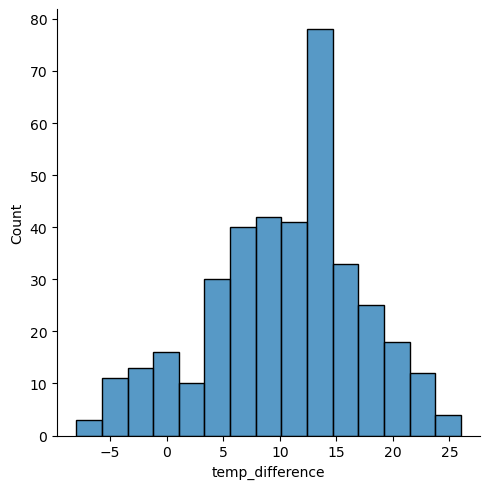

In [28]:
plot_cont(data)

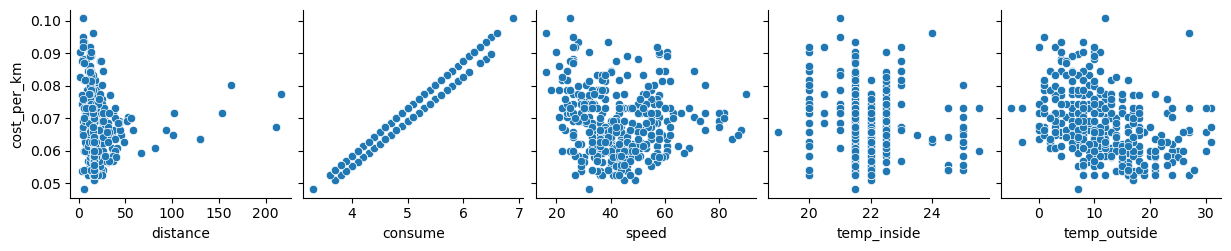

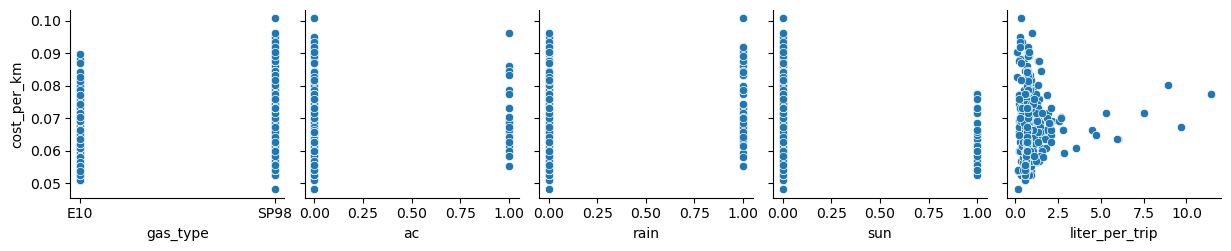

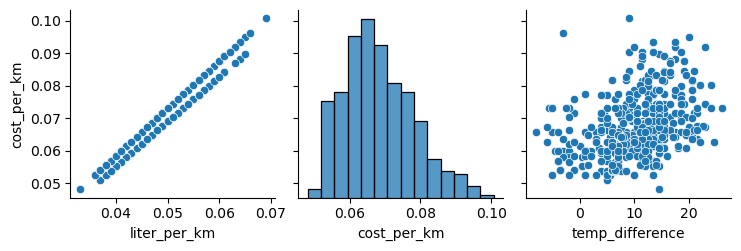

In [29]:
for i in range(0, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['cost_per_km'])

### I will look at some average values

- Average fuel consumption with E10 is slightly lower than SP98. 
- I can say E10 is more cost efficient than SP98.
- Vehicles with E10 were driven higher speeds with more temperature differences and longer distance in average.

In [30]:
data.groupby('gas_type', as_index=False)['cost_per_km'].mean()

,gas_type,cost_per_km
0,E10,0.066552
1,SP98,0.069393


In [31]:
data.groupby('gas_type', as_index=False)['speed'].mean()

,gas_type,speed
0,E10,43.935484
1,SP98,41.416290


In [32]:
data.groupby('gas_type', as_index=False)['temp_difference'].mean()

,gas_type,temp_difference
0,E10,11.683871
1,SP98,9.599548


In [33]:
data.groupby('gas_type', as_index=False)['distance'].mean()

,gas_type,distance
0,E10,21.609032
1,SP98,19.145701


### I am goint to split my data frame into 2 fuel group

In [34]:
data_e10 = data[data['gas_type'] == 'E10']

In [35]:
data_sp98 = data[data['gas_type'] == 'SP98']

- I can say when temperature difference is higher, both fuel groups burn more fuel

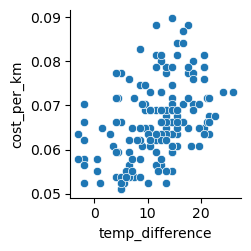

In [36]:
sns.pairplot(data=data_e10, x_vars=['temp_difference'],
                y_vars=['cost_per_km'])

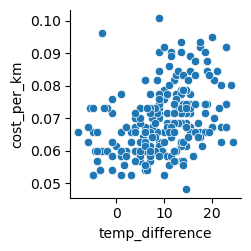

In [37]:
sns.pairplot(data=data_sp98, x_vars=['temp_difference'],
                y_vars=['cost_per_km'])

- When AC is on, SP98 burns more fuel on average, 
- E10 is almost same

In [38]:
data_e10.groupby('ac', as_index=False)['cost_per_km'].mean()

,ac,cost_per_km
0,0,0.066573
1,1,0.066010


In [39]:
data_sp98.groupby('ac', as_index=False)['cost_per_km'].mean()

,ac,cost_per_km
0,0,0.069248
1,1,0.070775


### I have little bit time left, let me try to build a linear regression model to predict fuel consumption 

- So I tried linear regression but I had terrible score. I dont have time to check where I did wrong or how I could improve

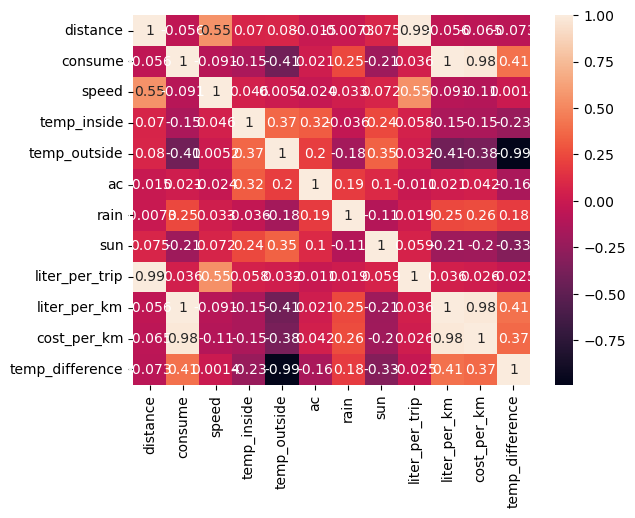

In [40]:
correlations_matrix = data.corr()   
#show heatmapte 
sns.heatmap(correlations_matrix, annot=True)
plt.show()

- I will drop liter per km and consume columns that I already used to calcuate cost per km
- I dont see other highly correlated columns

In [41]:
data = data.drop(columns=['liter_per_km', 'liter_per_trip','consume'], axis=1)

In [42]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
lm = linear_model.LinearRegression()

In [43]:
# X-y split
y = data['cost_per_km']
X = data.drop(['cost_per_km'], axis=1)

In [44]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [45]:
#splitting into categorical and numerical
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)

X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

In [46]:
#scale numericals
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num) 
numericals_train_scaled = transformer.transform(X_train_num)
numericals_test_scaled = transformer.transform(X_test_num)

In [47]:
#encode categoricals
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', drop='first').fit(X_train_cat)
categoricals_train_encoded = encoder.transform(X_train_cat).toarray()
categoricals_test_encoded = encoder.transform(X_test_cat).toarray()

In [48]:
X_train = np.concatenate((numericals_train_scaled,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_scaled,categoricals_test_encoded),axis=1)
X_train = pd.DataFrame(X_train)

In [49]:
#we train/fit our model like yesterday
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [50]:
from sklearn.metrics import r2_score
predictions_train = lm.predict(X_train)
r2_score(y_train, predictions_train) 

0.2513096657733914

In [51]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.13573311561917045